# Importing Statements

In [48]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading the Dataset

In [4]:
train_data_dir = 'Face Detection/train'
test_data_dir = 'Face Detection/test'

In [5]:
# Set the parameters for the data generators
img_width, img_height = 48, 48  
batch_size = 32  # Number of images to process at once

# Create an instance of ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values to [0, 1]
    rotation_range=30,  # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of height
    shear_range=0.2,  # Randomly apply shearing transformations
    zoom_range=0.2,  # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill pixels lost after transformations
)

# Create an instance of ImageDataGenerator for test data without data augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Only rescaling

In [35]:
# Prepare the train and validation generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [36]:
print(f"Classes found: {train_generator.class_indices}")
print(f"Number of images in training set: {train_generator.samples}")
print(f"Number of images in test set: {validation_generator.samples}")

Classes found: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Number of images in training set: 28709
Number of images in test set: 7178


# Visualizing the DataSet

In [18]:
# Define the path
train_data_dir = 'Face Detection/train'

# List of emotion categories (subfolder names)
emotion_categories = os.listdir(train_data_dir)
emotion_counts = []

# Count the number of images in each category
for category in emotion_categories:
    category_path = os.path.join(train_data_dir, category)
    emotion_counts.append(len(os.listdir(category_path)))

### **Bar Chart** 
To visualize the distribution of the images among various classes.

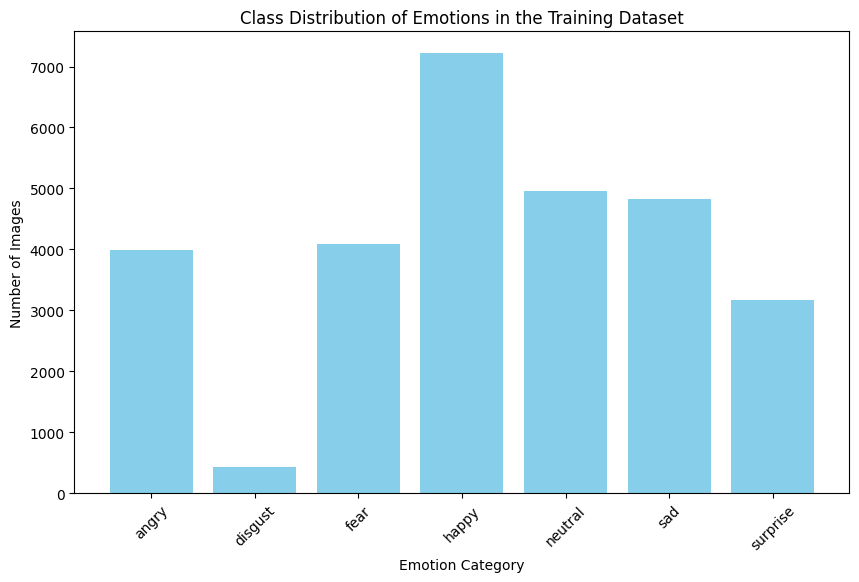

In [11]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotion_categories, emotion_counts, color='skyblue')
plt.title('Class Distribution of Emotions in the Training Dataset')
plt.xlabel('Emotion Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

It shows that most of the images are in the happy folder while disgust has less images then the rest of others.

If the model **overfitted** during training, we can come back and read equal imaes from each folder.

In [15]:
# Define the path
test_data_dir = 'Face Detection/test'

# List of emotion categories (subfolder names)
emotion_categories = os.listdir(test_data_dir)
emotion_counts = []

# Count the number of images in each category
for category in emotion_categories:
    category_path = os.path.join(test_data_dir, category)
    emotion_counts.append(len(os.listdir(category_path)))

print(emotion_counts)

[958, 111, 1024, 1774, 1233, 1247, 831]


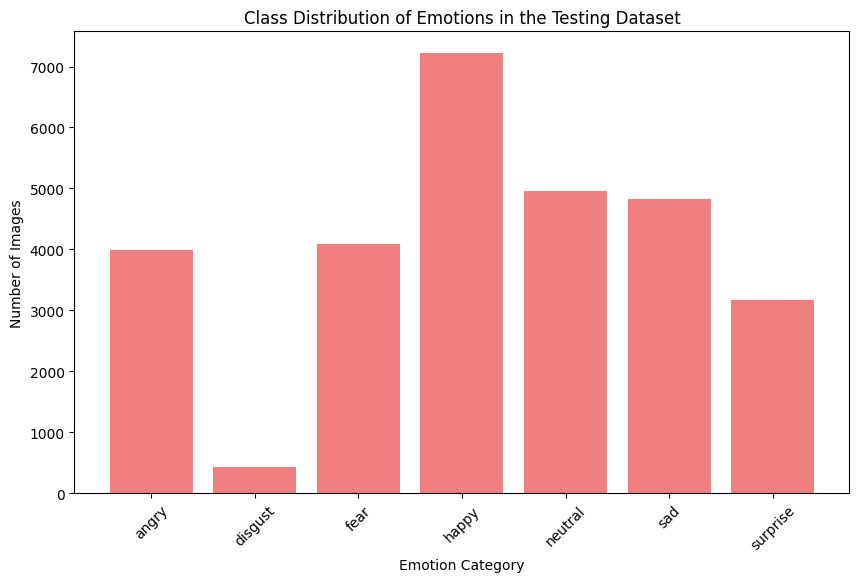

In [28]:
# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotion_categories, emotion_counts, color='lightcoral')
plt.title('Class Distribution of Emotions in the Testing Dataset')
plt.xlabel('Emotion Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

The distribution of the images in the test dataset is same as in the training dataset.

### **Image Plotting** 
To visualize the Image from each Category

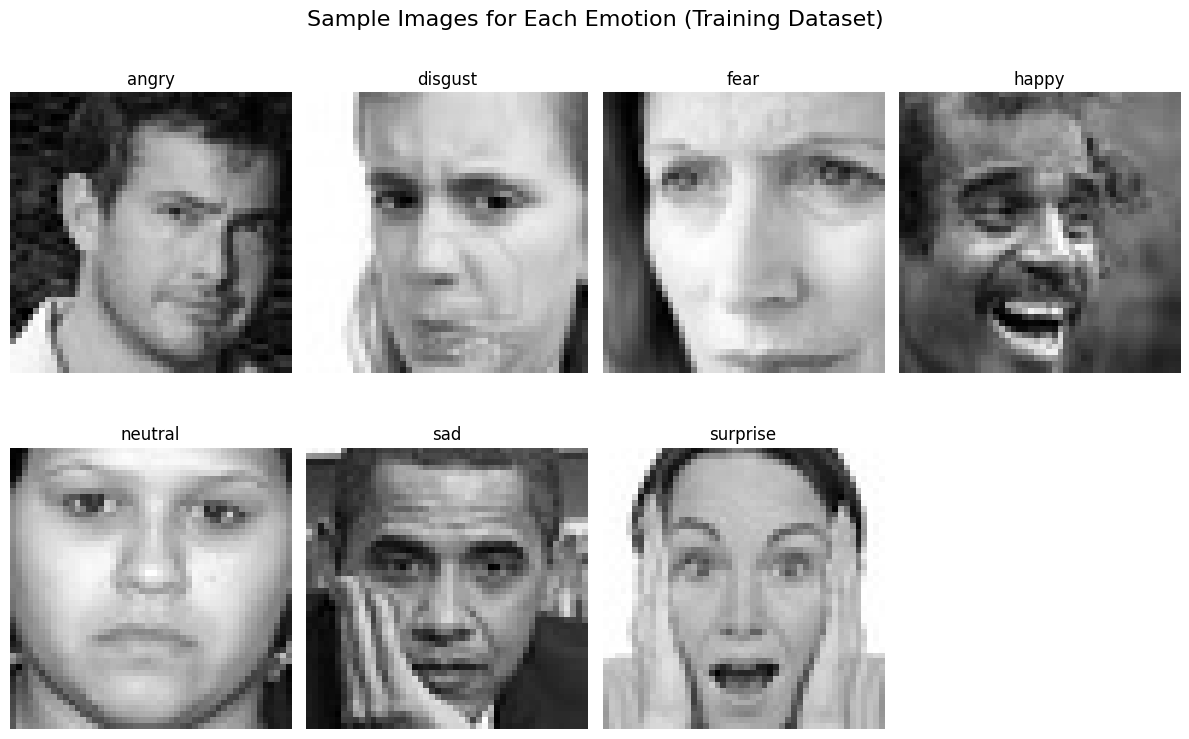

In [25]:
# Function to plot sample images for each emotion
def plot_sample_images(data_dir, emotion_categories, img_width, img_height, caption="Training Dataset"):
    plt.figure(figsize=(12, 8))
    for i, category in enumerate(emotion_categories):
        # Get a list of all images in the current emotion category
        category_path = os.path.join(data_dir, category)
        images = os.listdir(category_path)
        
        # Read the first image from the current category
        img_path = os.path.join(category_path, images[1])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (img_width, img_height))

        # Plot the image
        plt.subplot(2, 4, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(category)
        plt.axis('off')
        
    plt.suptitle(f'Sample Images for Each Emotion ({caption})', fontsize=16)
    plt.tight_layout()
    plt.show()

plot_sample_images(train_data_dir, emotion_categories, img_width=48, img_height=48)

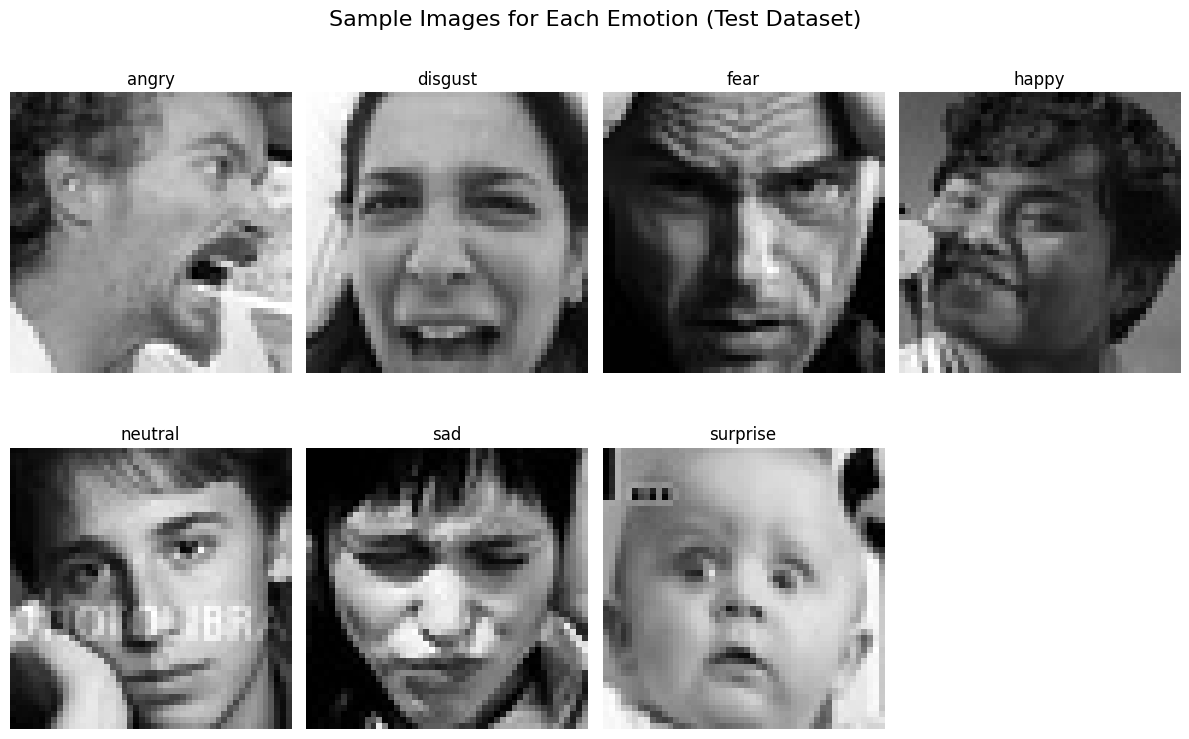

In [26]:
plot_sample_images(test_data_dir, emotion_categories, img_width=48, img_height=48, caption="Test Dataset")

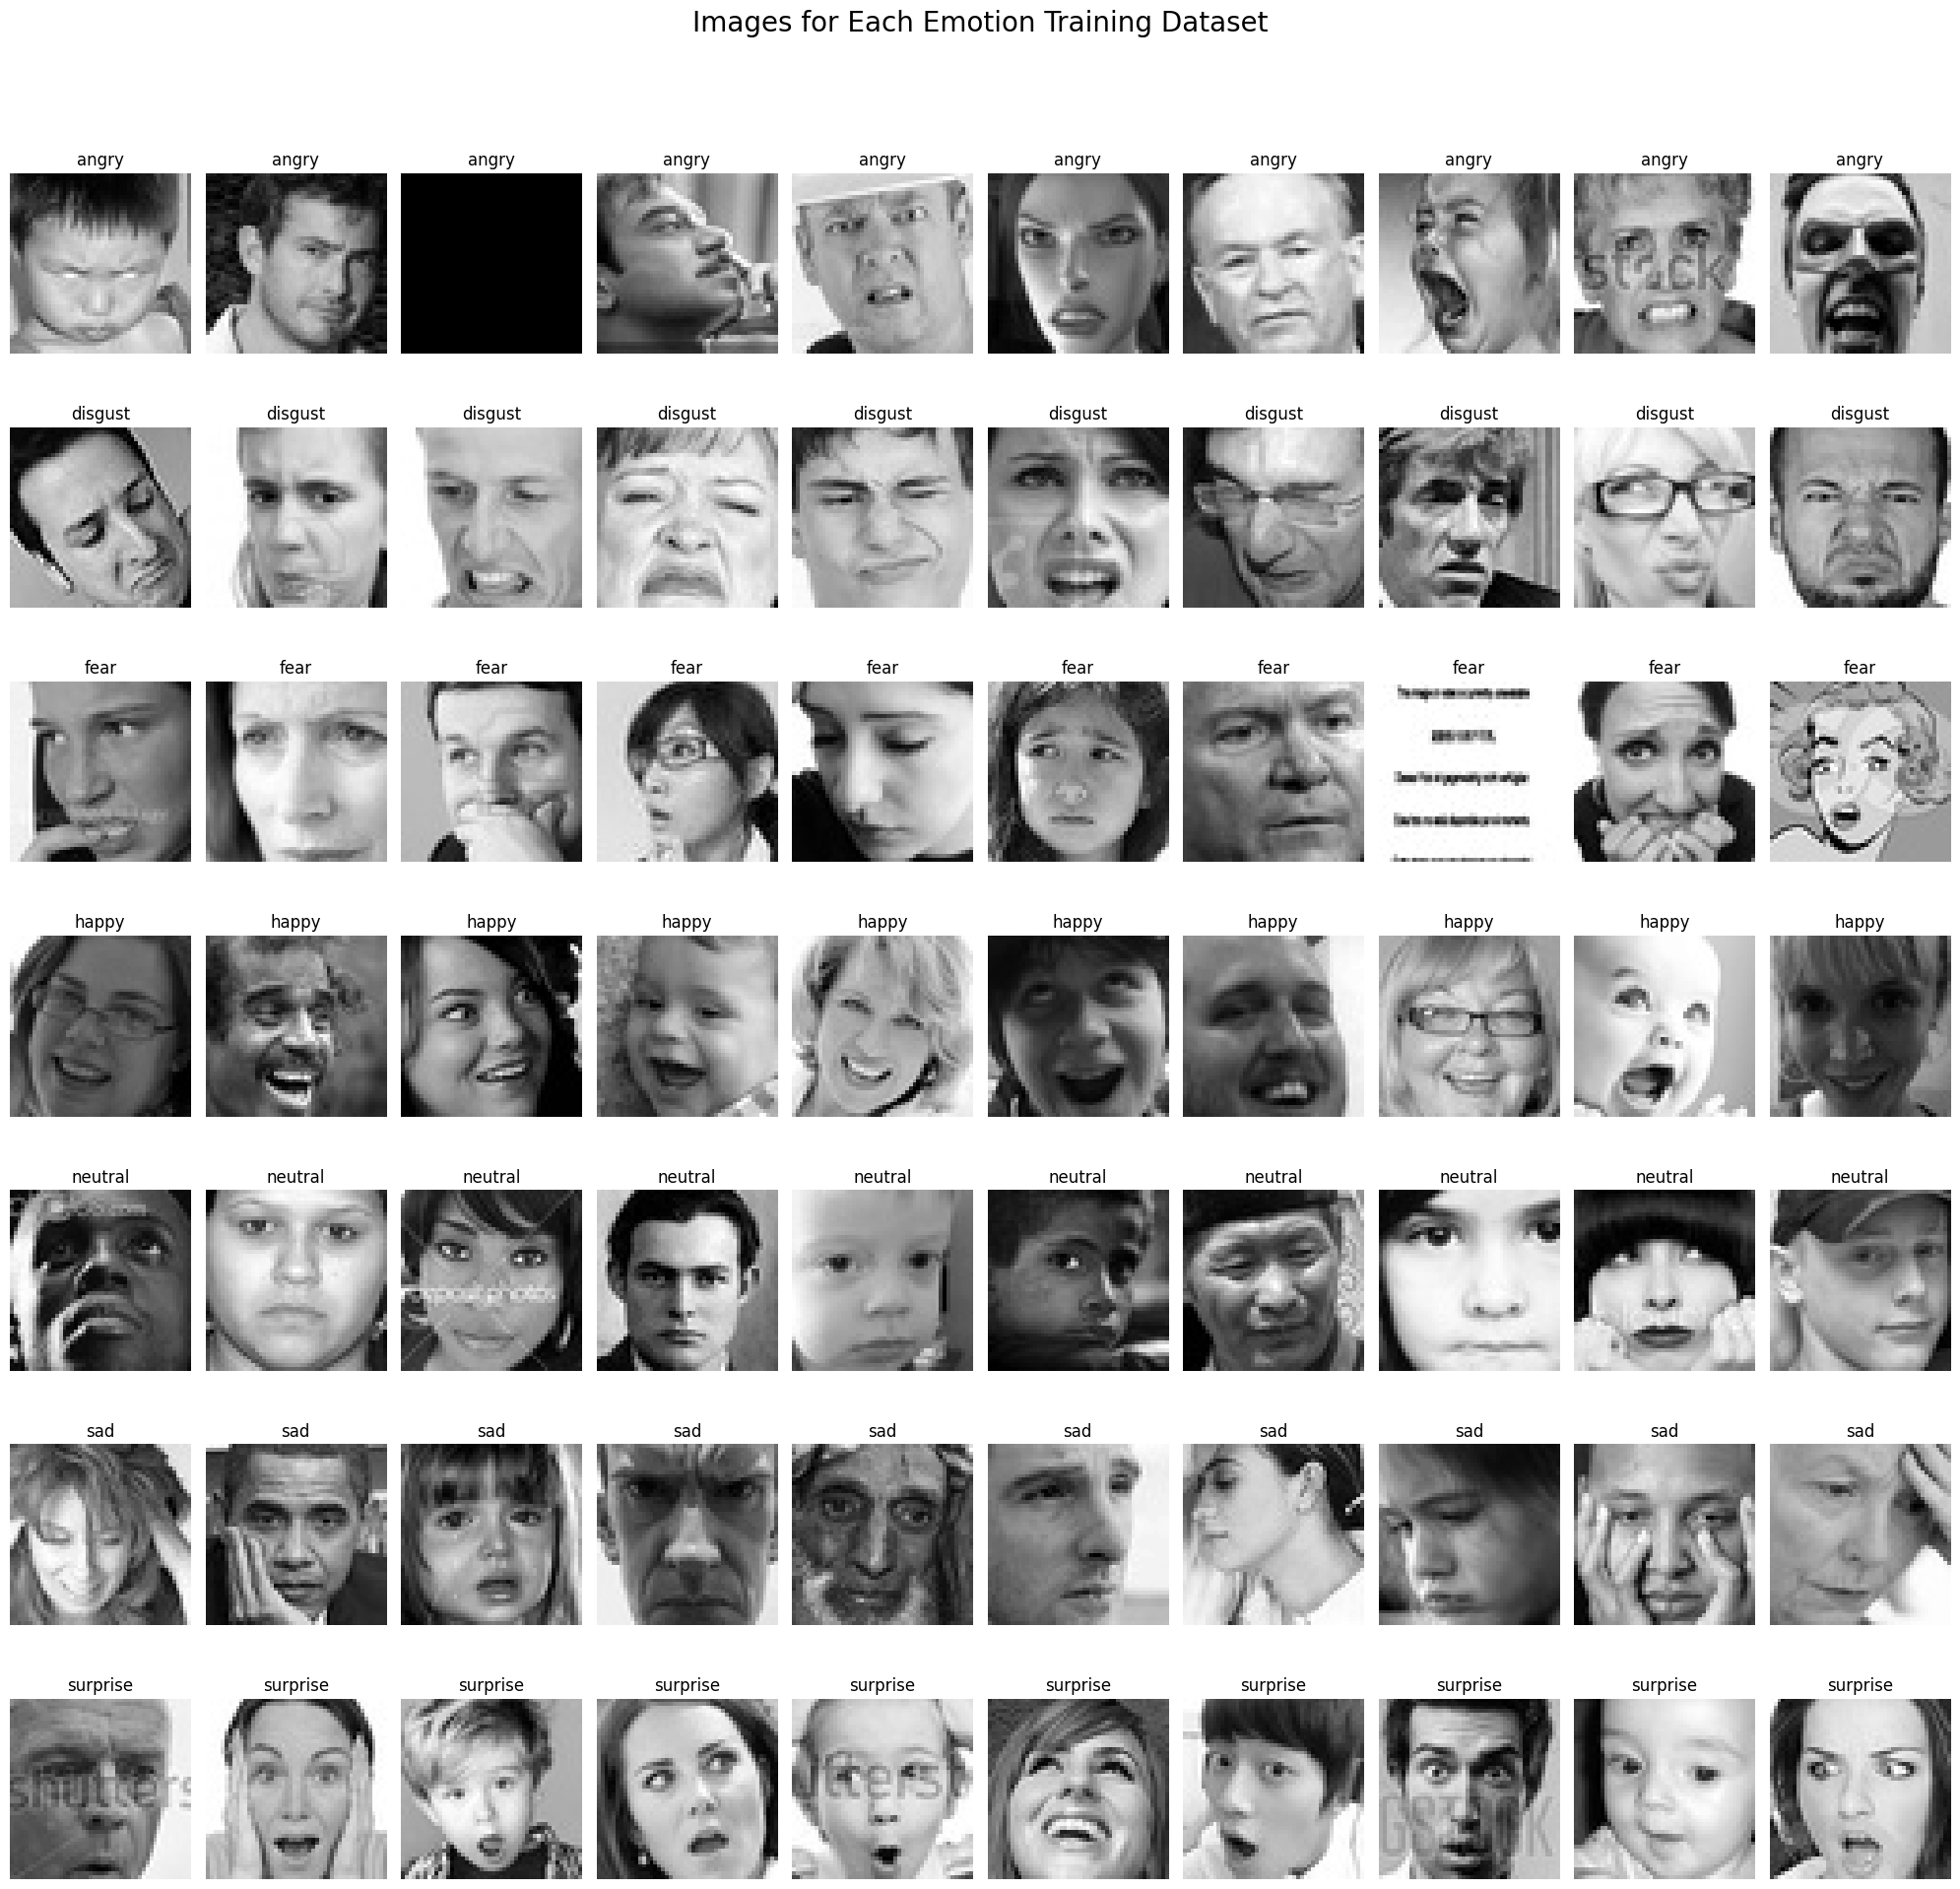

In [31]:
# Function to plot 10 sample images for each emotion
def plot_sample_images_10(data_dir, emotion_categories, img_width, img_height, caption="Training Dataset"):
    plt.figure(figsize=(20, 20))  

    for i, category in enumerate(emotion_categories):
        # Get a list of all images in the current emotion category
        category_path = os.path.join(data_dir, category)
        images = os.listdir(category_path)
        
        # Plot the first 10 images of the current category
        for j in range(10):
            img_path = os.path.join(category_path, images[j])
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_width, img_height))

            # Calculate the position for the subplot
            plt.subplot(len(emotion_categories), 10, i * 10 + j + 1)
            plt.imshow(img, cmap='gray')
            plt.title(category)
            plt.axis('off')

    # Add a title to the whole plot
    plt.suptitle(f'Images for Each Emotion {caption}', fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  # Adjust the top to make space for suptitle
    plt.show()

emotion_categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']  

plot_sample_images_10(train_data_dir, emotion_categories, img_width=48, img_height=48)


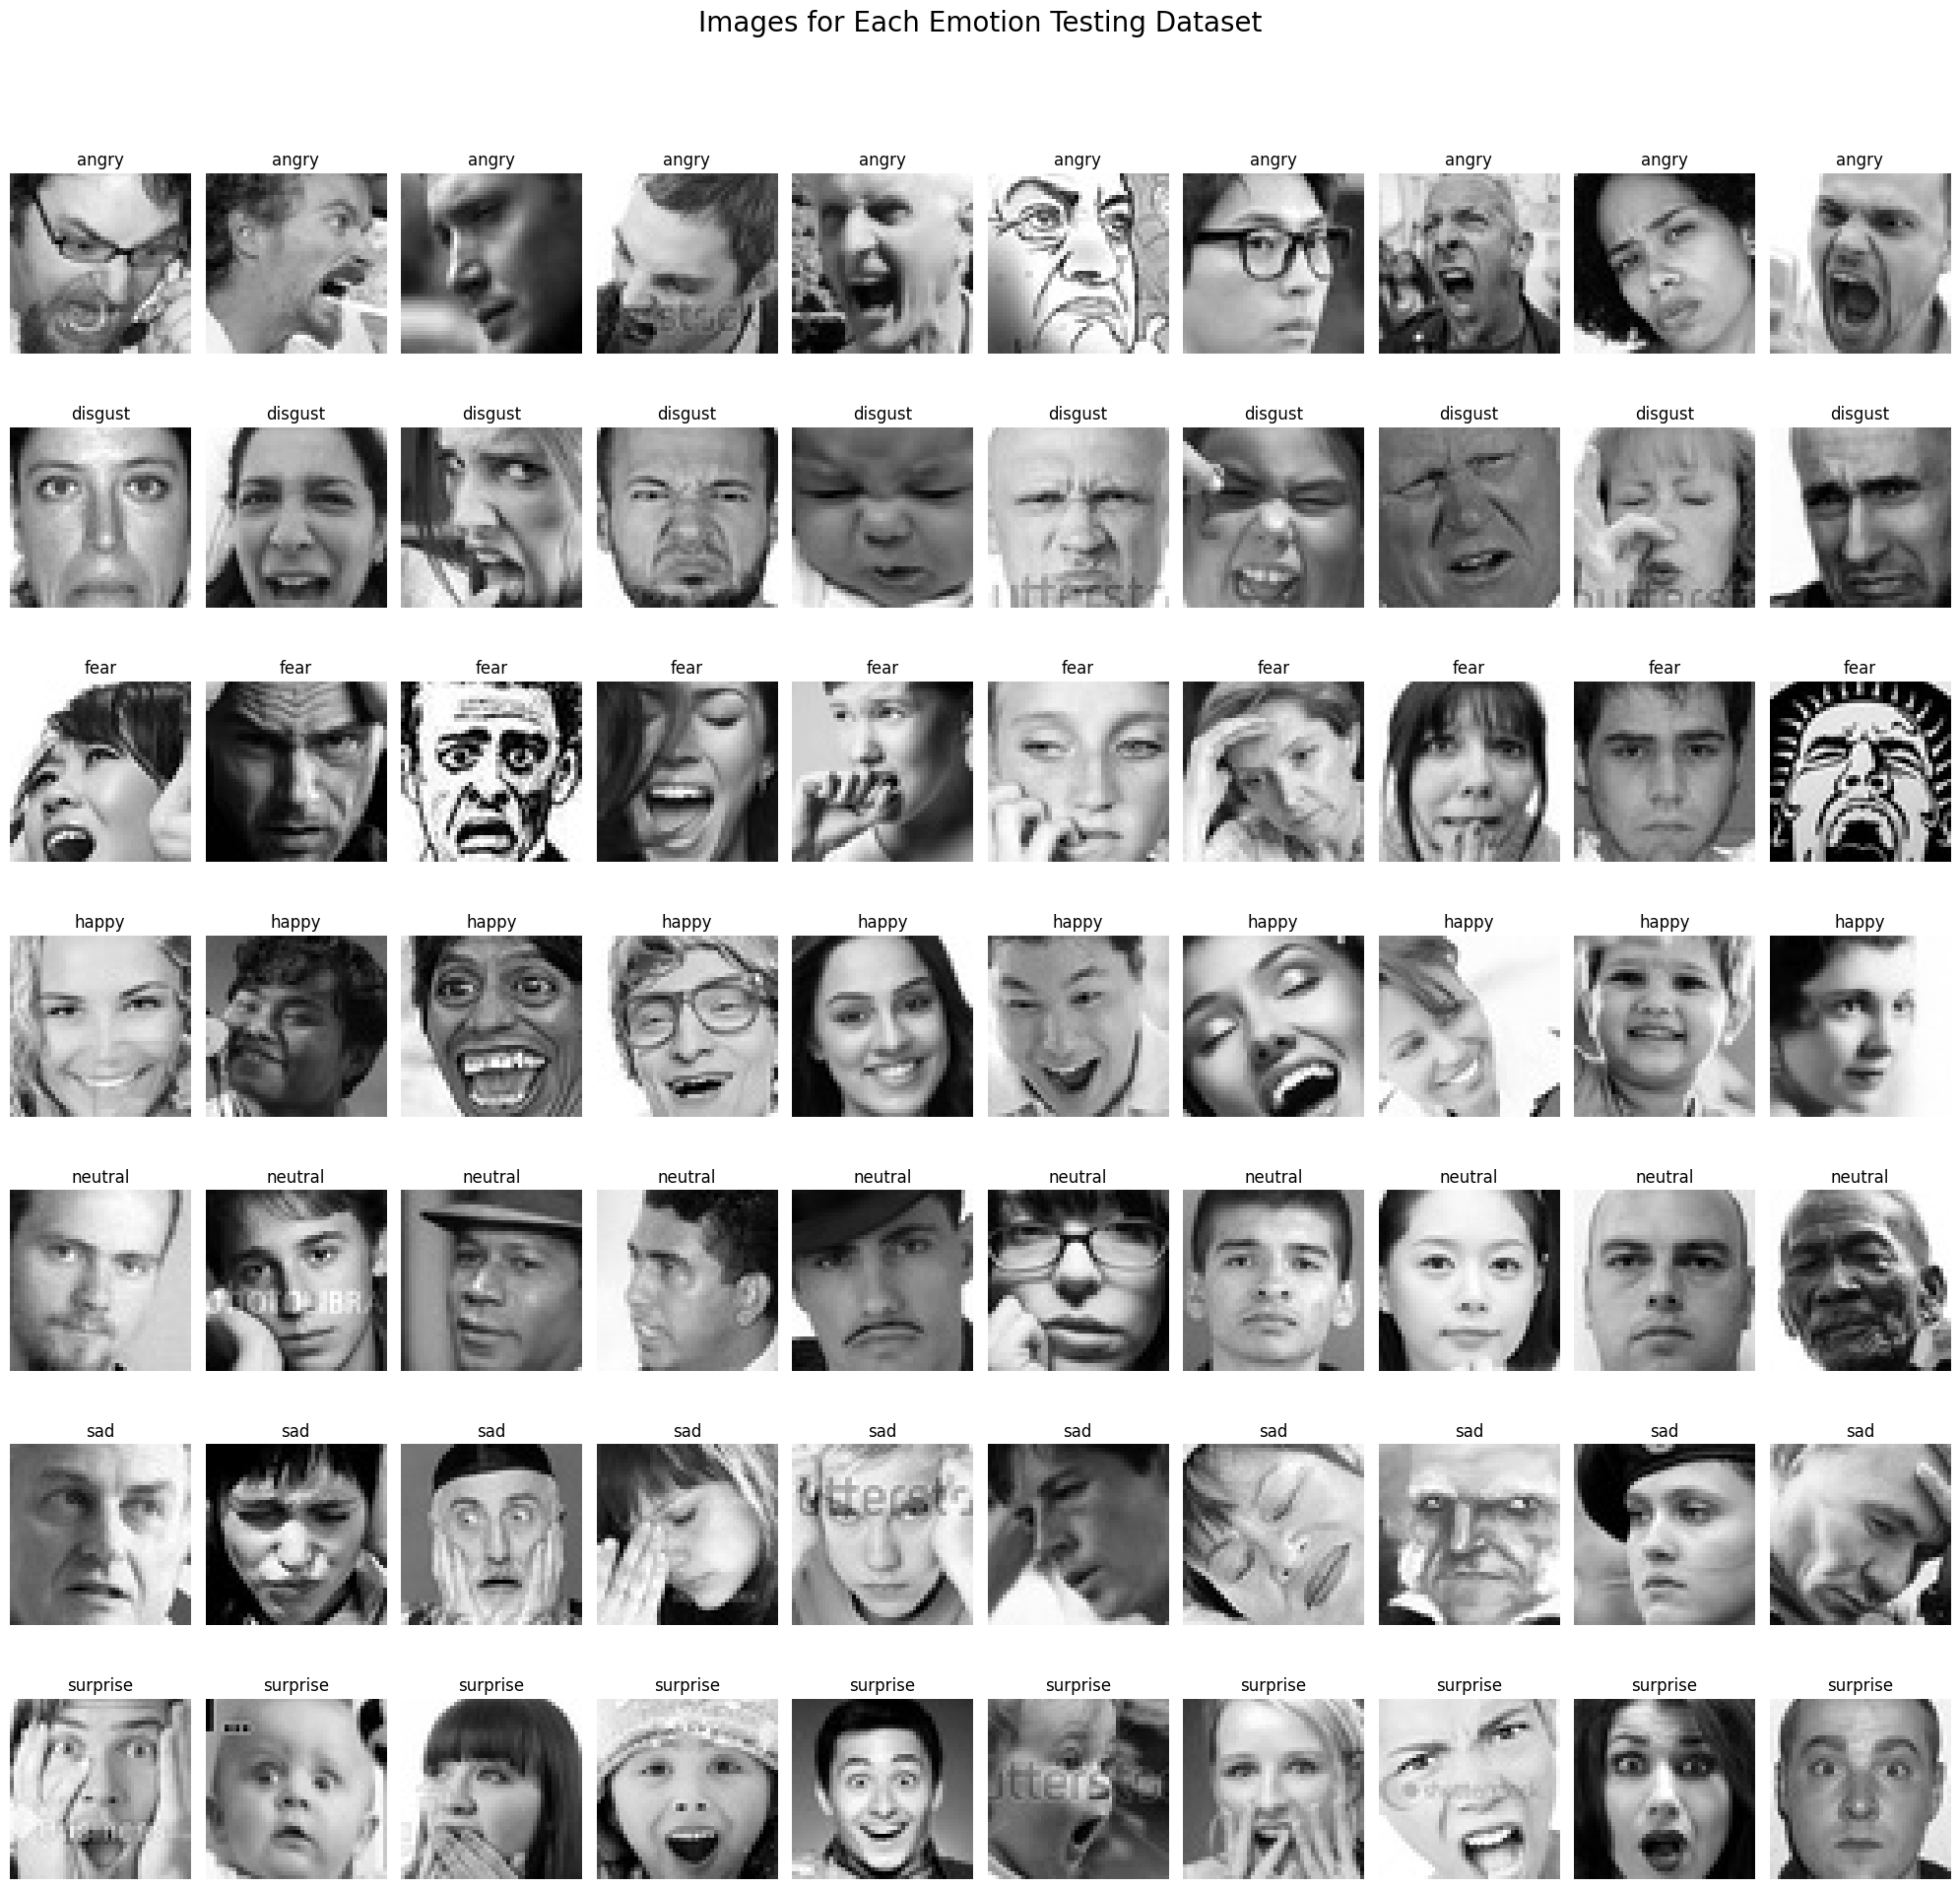

In [32]:
plot_sample_images_10(test_data_dir, emotion_categories, img_width=48, img_height=48, caption = "Testing Dataset")

## Histogram to visualize Dimensions
To ensure that every image has same dimension

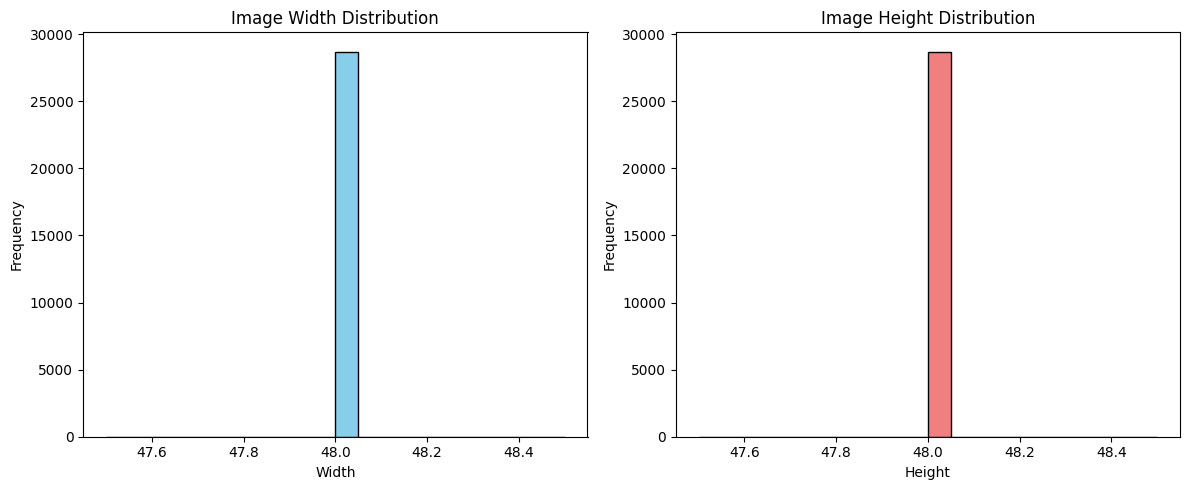

In [27]:
image_widths = []
image_heights = []

for category in emotion_categories:
    category_path = os.path.join(train_data_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path)
        h, w, _ = img.shape
        image_widths.append(w)
        image_heights.append(h)

plt.figure(figsize=(12, 5))

# Width distribution
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=20, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

# Height distribution
plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=20, color='lightcoral', edgecolor='black')
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


This shows our uniform height and width of 48 each. This means that our data is well shaped.

# Building a CNN Model

Defining a simple CNN model that can work on CPU as well.

In [38]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 output neurons for 7 emotion categories
])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 30
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/30


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 193s 211ms/step - accuracy: 0.2408 - loss: 1.8327 - val_accuracy: 0.2513 - val_loss: 1.7896
Epoch 2/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.2500 - loss: 1.7577 - val_accuracy: 0.3000 - val_loss: 1.7945
Epoch 3/30


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


897/897 ━━━━━━━━━━━━━━━━━━━━ 118s 131ms/step - accuracy: 0.2523 - loss: 1.7913 - val_accuracy: 0.2775 - val_loss: 1.7487
Epoch 4/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 78us/step - accuracy: 0.2812 - loss: 1.7358 - val_accuracy: 0.1000 - val_loss: 1.9029
Epoch 5/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 90s 99ms/step - accuracy: 0.2632 - loss: 1.7757 - val_accuracy: 0.2838 - val_loss: 1.7268
Epoch 6/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 41us/step - accuracy: 0.2500 - loss: 1.8157 - val_accuracy: 0.5000 - val_loss: 1.6517
Epoch 7/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 85s 94ms/step - accuracy: 0.2673 - loss: 1.7646 - val_accuracy: 0.2995 - val_loss: 1.6948
Epoch 8/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.2500 - loss: 1.8784 - val_accuracy: 0.3000 - val_loss: 1.5498
Epoch 9/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 78s 86ms/step - accuracy: 0.2784 - loss: 1.7471 - val_accuracy: 0.3255 - val_loss: 1.6552
Epoch 10/30
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 65us/step - accuracy: 0.3125 - loss: 1.8093 - val_accuracy

### Saving the Model

In [41]:
model.save('emotion_detection_model.h5')

### Evaluating The Model

In [42]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.4785 - loss: 1.3594
Validation Loss: 1.3613823652267456
Validation Accuracy: 0.4796600639820099


In [43]:
# Printing Classification Report
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels from the generator
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step
              precision    recall  f1-score   support

       angry       0.13      0.06      0.08       958
     disgust       0.00      0.00      0.00       111
        fear       0.18      0.01      0.02      1024
       happy       0.25      0.31      0.28      1774
     neutral       0.17      0.30      0.22      1233
         sad       0.17      0.16      0.16      1247
    surprise       0.12      0.16      0.14       831

    accuracy                           0.18      7178
   macro avg       0.15      0.14      0.13      7178
weighted avg       0.18      0.18      0.16      7178



c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### Visualizing the Accuracy

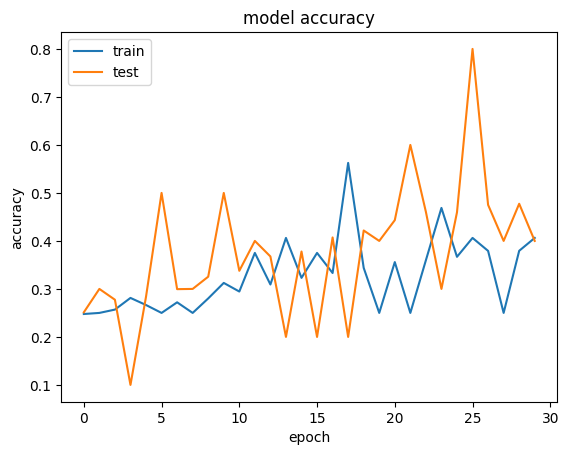

<Figure size 640x480 with 0 Axes>

In [44]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig('accuracy.png')

### Visualizing the loss

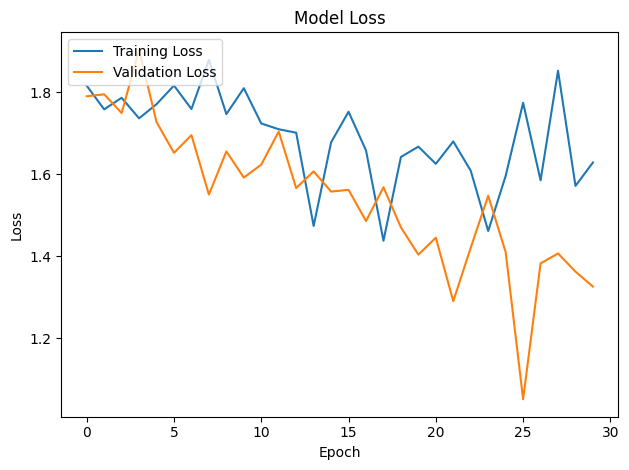

In [45]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

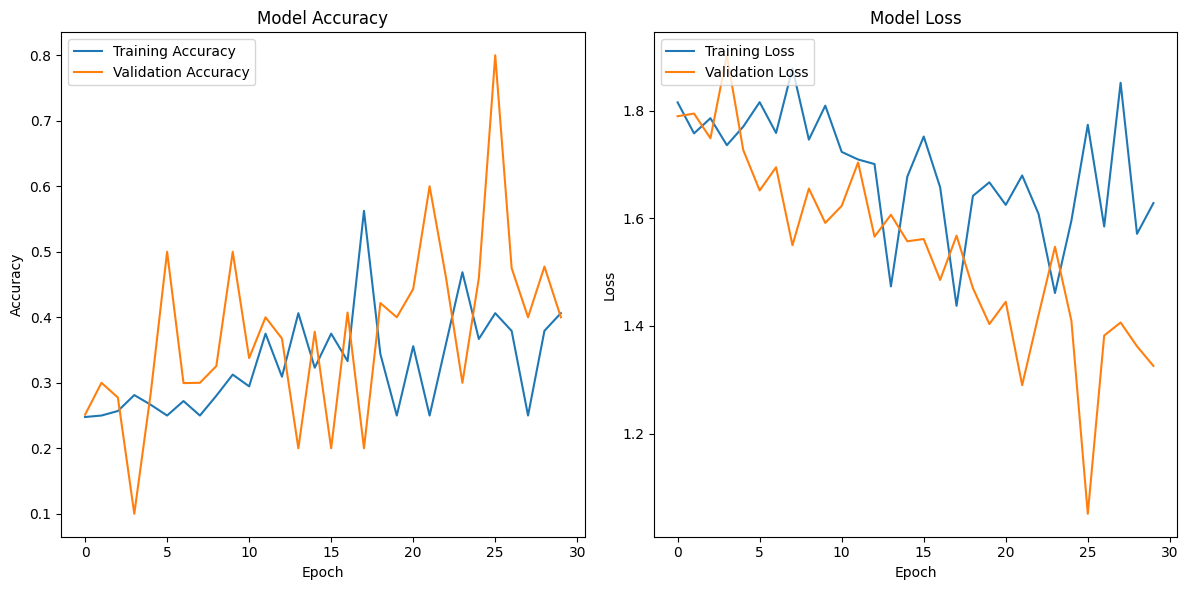

In [46]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step


<Figure size 1000x700 with 0 Axes>

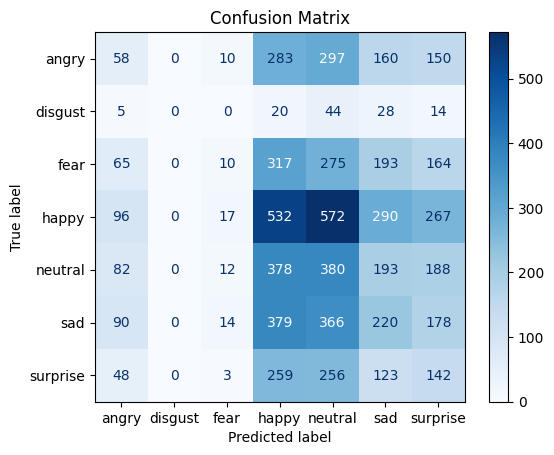

In [49]:
# Get predictions from the model
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm_display = ConfusionMatrixDisplay(cm, display_labels=validation_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 7))
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()